*O que é uma Rede Neural?*

Uma rede neural é um modelo computacional inspirado no funcionamento do cérebro humano. 

------------------------------------------------------------------------------

*ENTRADA E SAIDa

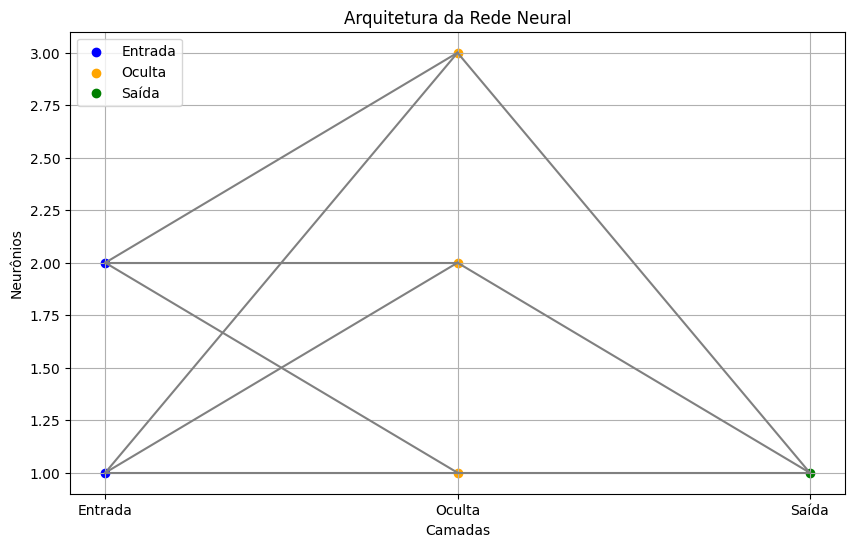

In [71]:
import matplotlib.pyplot as plt

def plot_neural_network(input_size, hidden_size, output_size):
    # Definir os nós de cada camada
    input_layer = range(1, input_size + 1)
    hidden_layer = range(1, hidden_size + 1)
    output_layer = range(1, output_size + 1)
    
    # Plotar os nós de cada camada
    plt.figure(figsize=(10, 6))
    plt.title('Arquitetura da Rede Neural')
    plt.scatter([1]*len(input_layer), input_layer, color='blue', label='Entrada')
    plt.scatter([2]*len(hidden_layer), hidden_layer, color='orange', label='Oculta')
    plt.scatter([3]*len(output_layer), output_layer, color='green', label='Saída')
    
    # Plotar conexões entre os nós
    for i in input_layer:
        for j in hidden_layer:
            plt.plot([1, 2], [i, j], color='gray')
    for j in hidden_layer:
        for k in output_layer:
            plt.plot([2, 3], [j, k], color='gray')
    
    plt.xticks([1, 2, 3], ['Entrada', 'Oculta', 'Saída'])
    plt.xlabel('Camadas')
    plt.ylabel('Neurônios')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Exemplo de uso
plot_neural_network(2, 3, 1)


MAIS NEURONIOS

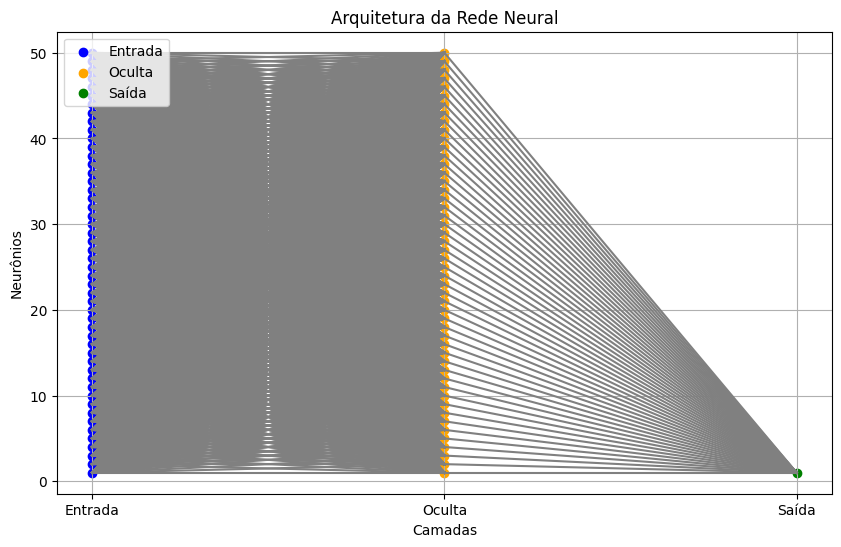

In [73]:
import matplotlib.pyplot as plt

def plot_neural_network(input_size, hidden_size, output_size):
    # Definir os nós de cada camada
    input_layer = range(1, input_size + 1)
    hidden_layer = range(1, hidden_size + 1)
    output_layer = range(1, output_size + 1)
    
    # Plotar os nós de cada camada
    plt.figure(figsize=(10, 6))
    plt.title('Arquitetura da Rede Neural')
    plt.scatter([1]*len(input_layer), input_layer, color='blue', label='Entrada')
    plt.scatter([2]*len(hidden_layer), hidden_layer, color='orange', label='Oculta')
    plt.scatter([3]*len(output_layer), output_layer, color='green', label='Saída')
    
    # Plotar conexões entre os nós
    for i in input_layer:
        for j in hidden_layer:
            plt.plot([1, 2], [i, j], color='gray')
    for j in hidden_layer:
        for k in output_layer:
            plt.plot([2, 3], [j, k], color='gray')
    
    plt.xticks([1, 2, 3], ['Entrada', 'Oculta', 'Saída'])
    plt.xlabel('Camadas')
    plt.ylabel('Neurônios')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Exemplo de uso com o mesmo número de neurônios que temos
num_inputs = 50  # Supondo que tenhamos 4 entradas
plot_neural_network(num_inputs, num_inputs, 1)


---------------------

*MODELO TENSOR FLOW*

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models 
from tensorflow.keras.datasets import mnist

In [ ]:
# Importar bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Carregar o conjunto de dados MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pré-processamento dos dados
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Construir a arquitetura da rede neural
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


-----------------------------------------------------------

*MODELO PYTORCH*

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# Definir transformações para normalização dos dados
transform = transforms.Compose([
    transforms.ToTensor(),  # Converter as imagens para tensores
    transforms.Normalize((0.1307,), (0.3081,))  # Normalizar os tensores
])

# Carregar conjunto de dados MNIST
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

# Definir o DataLoader para carregar os dados em lotes
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Definir a arquitetura da rede neural
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Camada totalmente conectada
        self.fc2 = nn.Linear(128, 10)  # Camada de saída

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanar a imagem para vetor
        x = torch.relu(self.fc1(x))  # Aplicar função de ativação ReLU
        x = self.fc2(x)  # Saída sem função de ativação (usaremos softmax na função de perda)
        return x

# Instanciar a rede neural
model = SimpleNN()

# Definir a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()  # Função de perda de entropia cruzada para classificação
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Otimizador SGD

# Treinar a rede neural
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass e otimização
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Imprimir a perda a cada 100 lotes
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Testar o modelo
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


-------------------------------

*SKLEARN*

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Carregar conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instanciar o classificador SVM
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Treinar o classificador SVM
svm_classifier.fit(X_train, y_train)

# Prever os rótulos das amostras de teste
y_pred = svm_classifier.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM: {accuracy}')

print(f'Dados de treino: {y_test}, {X_test}')


----------

*POR DENTRO*

so q co keras e matplotlib

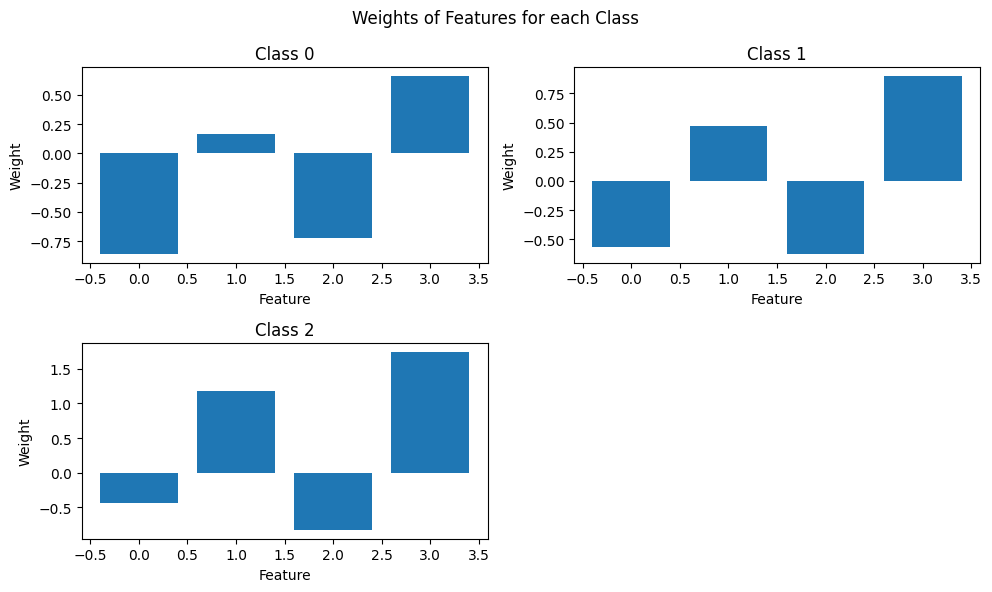

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Criar um conjunto de dados sintético
X, y = make_classification(n_samples=100, n_features=4, n_classes=3, n_clusters_per_class=1, random_state=42)

# Treinar um modelo SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Obter os coeficientes do modelo SVM (pesos das características)
weights = model.coef_

# Plotar os pesos das características para as 4 dimensões
plt.figure(figsize=(10, 6))
for i in range(len(weights)):
    plt.subplot(2, 2, i + 1)
    plt.bar(range(X.shape[1]), weights[i])
    plt.title(f'Class {i}')
    plt.xlabel('Feature')
    plt.ylabel('Weight')
plt.suptitle('Weights of Features for each Class')
plt.tight_layout()
plt.show()


Acurácia do modelo MLP: 1.00


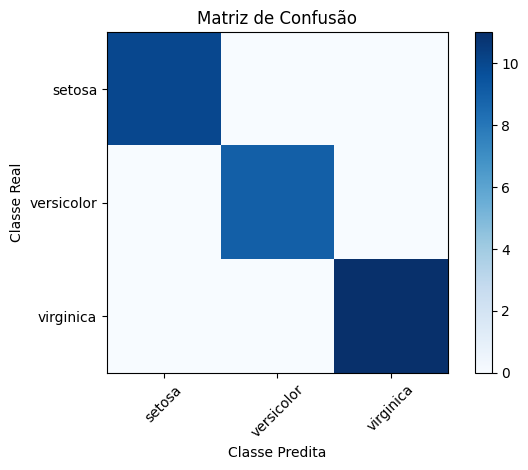

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  # Adicionando importação da matriz de confusão

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento: normalização das características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir e treinar a rede neural
model = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Avaliar a acurácia do modelo
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo MLP: {accuracy:.2f}')

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.tight_layout()
plt.show()


----------------------

*TRAVESSAR SINAl*

Acurácia do modelo SVM: 1.00


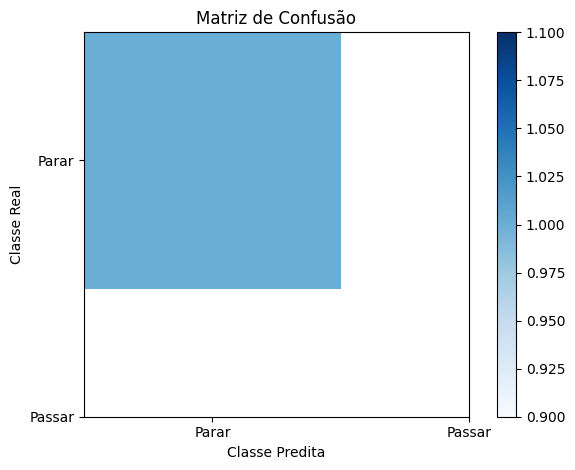

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Dados de treinamento: características e rótulos (0 para "Parar", 1 para "Passar")
caracteristicas = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])  # Exemplo de características
rotulos = np.array([0, 1, 1, 0])  # Exemplo de rótulos

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, rotulos, test_size=0.2, random_state=42)

# Pré-processamento: normalização das características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o classificador SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Avaliar o modelo
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM: {accuracy:.2f}')

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Parar', 'Passar'])
plt.yticks(tick_marks, ['Parar', 'Passar'])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.tight_layout()
plt.show()


Acurácia do modelo SVM: 1.00


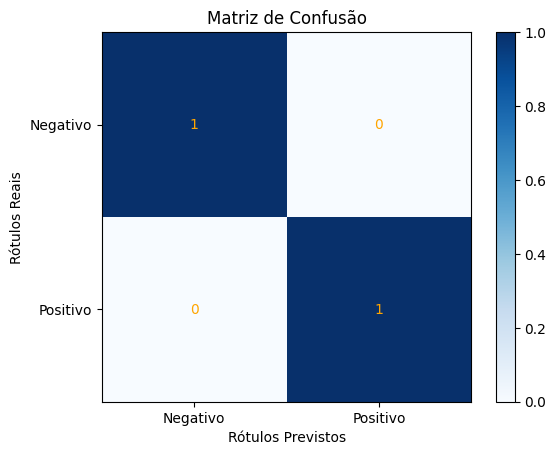

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dados de treinamento fictícios (características e rótulos)
X = np.array([[2, 1], [0, 0], [3, 3], [2, 0], [2, 2], [1, 1], [2, 3], [3, 2], [2, 2], [2, 1]])
y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento: Normalização das características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do classificador SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Avaliação do modelo
y_pred = svm.predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)
print(f'Acurácia do modelo SVM: {accuracy:.2f}')

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='orange')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Reais')
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.colorbar()
plt.show()


Acurácia do modelo SVM: 1.00


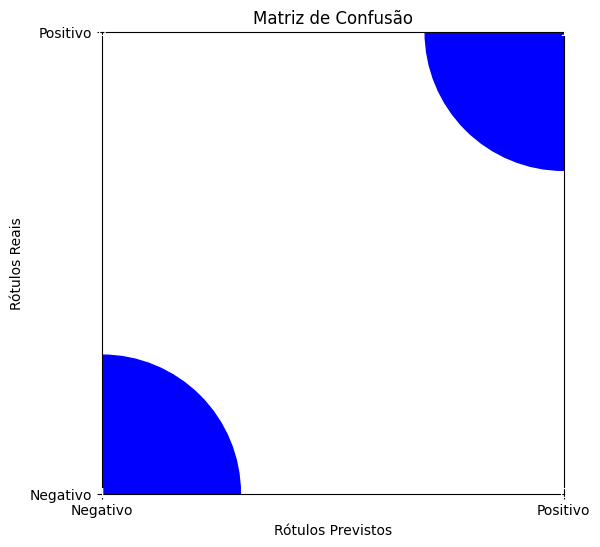

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dados de treinamento fictícios (características e rótulos)
X = np.array([[2, 1], [0, 0], [3, 3], [2, 0], [2, 2], [1, 1], [2, 3], [3, 2], [2, 2], [2, 1]])
y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento: Normalização das características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do classificador SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Avaliação do modelo
y_pred = svm.predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)
print(f'Acurácia do modelo SVM: {accuracy:.2f}')

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        circle = plt.Circle((j, i), radius=0.3*conf_matrix[i, j], color='blue', fill=True)
        plt.gca().add_patch(circle)
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')

plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Reais')
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(False)
plt.show()


-------------

*TA VIVO OU NAO?*

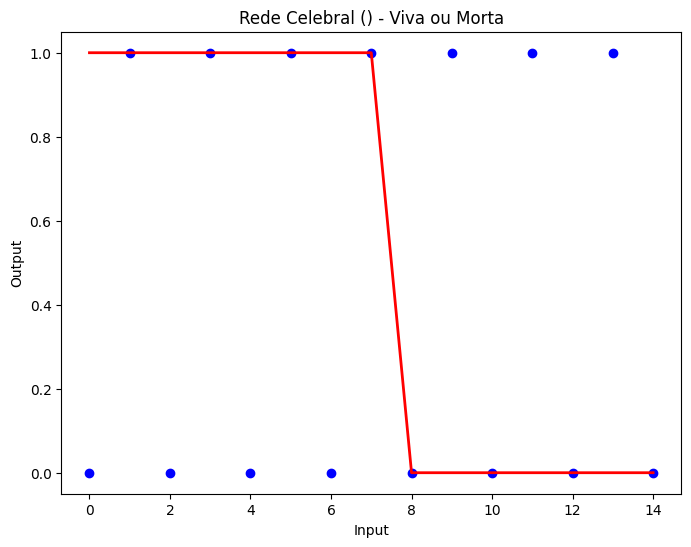

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Dados de treinamento
X = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Criar e treinar o modelo da RNA
model = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', max_iter=1000)
model.fit(X, y)

# Plotar os dados e a decisão do modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Rede Celebral () - Viva ou Morta')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()


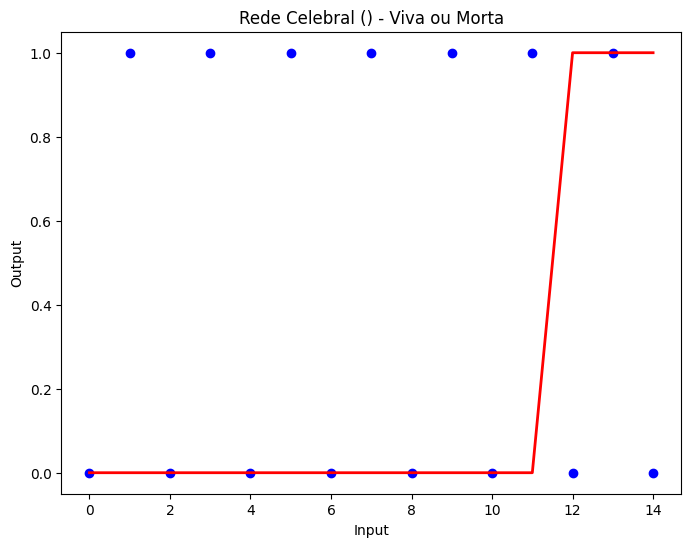

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Dados de treinamento
X = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Criar e treinar o modelo da RNA
model = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', max_iter=1000)
model.fit(X, y)

# Plotar os dados e a decisão do modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Rede Celebral () - Viva ou Morta')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

Acurácia do modelo: 0.60
Matriz de Confusão:
[[5 3]
 [3 4]]


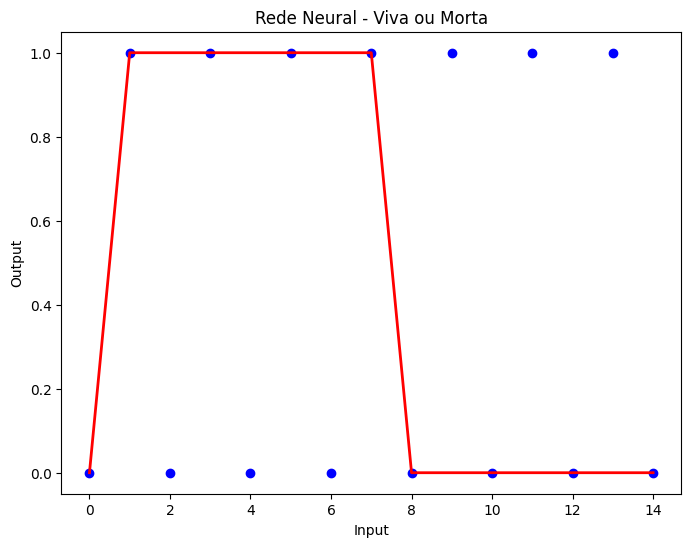

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Dados de treinamento
X = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Criar e treinar o modelo da RNA
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42)
model.fit(X, y)

# Fazer previsões
y_pred = model.predict(X)

# Avaliar o modelo
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print(f'Acurácia do modelo: {accuracy:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)

# Plotar os dados e a decisão do modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Rede Neural - Viva ou Morta')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()




*COM PRE_PROCESSAMENTO*

Acurácia do modelo: 0.00


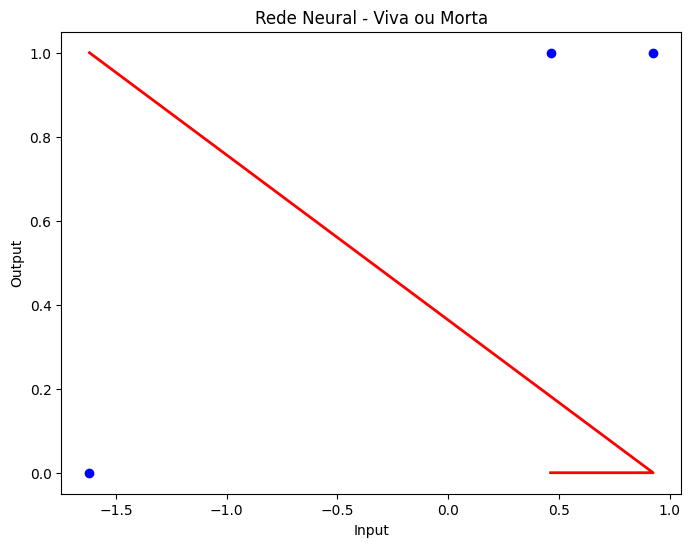

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dados de treinamento
X = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo da RNA
model = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Avaliar o modelo
accuracy = model.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Plotar os dados e a decisão do modelo
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2)
plt.title('Rede Neural - Viva ou Morta')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()


--------------

*COM hiperparâmetros*

Acurácia do modelo: 0.00


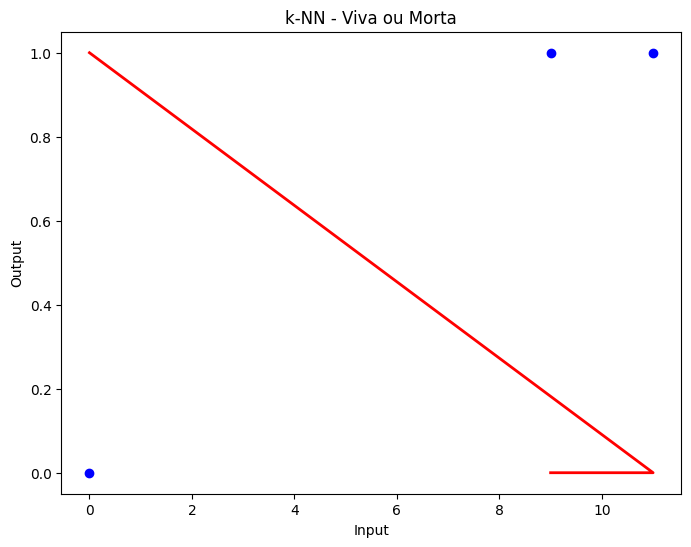

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dados de treinamento
X = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo k-NN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Plotar os dados e a decisão do modelo
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('k-NN - Viva ou Morta')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()


C:\Users\Glaucia\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia média: 0.2
Desvio padrão: 0.26666666666666666


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

# Dados de entrada e saída
X = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Criar o modelo da RNA com mais iterações
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=5000, random_state=42)

# Definir a estratégia de validação cruzada com k-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar o modelo usando validação cruzada
scores = cross_val_score(model, X, y, cv=kfold)

# Exibir a acurácia média e o desvio padrão
print("Acurácia média:", np.mean(scores))
print("Desvio padrão:", np.std(scores))


Acurácia média: 0.2
Desvio padrão: 0.26666666666666666
